# Flow shop problem

Постановка задачи
-------------------------
Пусть есть N задач и M станков\машин. Каждая задача состоит из M операций, каждая из которых выполняется на соответствующем станке. i-я операция выполняется на i-ой машине и может начаться только тогда, когда прошлая операция уже была выполнена. Задачи возможно выполнять в любом порядке. В том числе, порядок может отличаться на каждом станке. Задача заключается в составлении расписания с наименьшим временем выполнения задач.

Обзор
-------------------------
Проблема является P-сложной только для случая, когда M = 2. Для решения в этом случае применяется алгоритм Джонсона. В случае, когда M > 2, применяются прочие алгоритмы. Например, генетические. Так же возможно введение доп. ограничений на задачу для нахождения решений. Например, порядок задач для каждого этапа может быть одинаков.

Johnson's algorithm
--------------------------
 ![](johnson.png)


In [2]:
from collections import deque
from typing import List, Deque
from job import Job
from functools import cmp_to_key

def f2_cmax_johnson_solver(jobs: List[Job]) -> List[Job]:
    """
    Solver for the "F2 || C_max" task introduced in the following article:
    
    S.M. Johnson. Optimal two-and-three-stage production schedules with set-up times included.
    Naval Research Logistic Quaterly, 1:61–68, 1954
    
    link: https://www.rand.org/content/dam/rand/pubs/papers/2008/P402.pdf
    
    :param jobs: list of jobs to optimize schedule
    :returns: jobs ordered to minimize the makespan. As for F2 an order is equal for both stages, list is 1xN
    """
    # Validate input
    for job in jobs:
        if len(job.actions) != 2:
            raise ValueError("Johnson solver is able to solve F2||C_max only. "
                             f"There is a job with {len(job.actions)} actions, so it couldn't be executed as F2 job")

    # Sort by minimal stage time
    def jobs_comparator(lhs: Job, rhs: Job) -> int:
        return min(lhs.actions) - min(rhs.actions)

    sorted_jobs = sorted(jobs, key=cmp_to_key(jobs_comparator))
    first_stage_jobs: Deque[Job] = deque()
    second_stage_jobs: Deque[Job] = deque()

    for job in sorted_jobs:
        if job.actions[0] < job.actions[1]:
            first_stage_jobs.append(job)
        else:
            second_stage_jobs.appendleft(job)

    return list(first_stage_jobs + second_stage_jobs)

In [3]:
from data import load_data
jobs_data = load_data("data2x10.pkl")

In [4]:
from schedule import order_to_schedule

order = f2_cmax_johnson_solver(jobs_data)
schedule = order_to_schedule([order, order])
print(schedule)

############################
1694  5  7  8  2  0 3
  1 6 9  4   5   7   8 2 0 3
############################
Makespan: 28


Генетический подход
-------------------
Одним из самых популярных способов решения в MxN размерности - это генетические алгоритмы. Далее представлено решение с помощью Linkage tree genetic algorithm (LTGA)

```
LTGA()
    Pop <- InitPopulation
    while NotTerminated
        Tree <- BuildTree
        forall Sol 2 Pop:
            forall Clus 2 Tree:
                Sol <- GreedyRecombine(Sol,Clus,Pop)
    return Sol

GreedyRecombine(Sol,Clus,Pop)
    Donor <- Random(Pop)
    NewSol <- ReplaceClusValues(Sol,Clus,Donor)
        if Improvement(NewSol,Sol)
            then Sol <- NewSol
    return Sol
```

In [4]:
import pickle
from main import one_run
runs = []
for i in range(30):
    runFitness, finalBest = one_run(jobs_data)
    print(f"Run {i}")
    runs.append(runFitness)
    
with open("data/res.pkl", 'wb') as outp:
    pickle.dump(runs, outp, pickle.HIGHEST_PROTOCOL)
with open("data/best.pkl", 'wb') as outp:
    pickle.dump(finalBest, outp, pickle.HIGHEST_PROTOCOL)

10 (1,9,5,5,6,2,3,2,7,6,7,0,4,3,0,1,9,4,8,8) = 32
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31
10 (8,8,4,1,2,3,1,3,9,4,6,0,6,9,5,7,5,0,7,2) = 31


In [7]:
from ltga.FitnessFunction import ScheduleFitness
import pickle

with open("data/res5x100.pkl", 'rb') as inp:
    runs = pickle.load(inp)
results = [run[-1] for run in runs]
print(min(results), max(results))

with open("data/best.pkl", 'rb') as inp:
    best = pickle.load(inp)
print(ScheduleFitness(jobs_data).genesToSchedule(best.genes))

563 563
#############################
1 7  0  8 3 2 69 5 4 
  1  7  0  3 8 2 6 9  5   4  
#############################
Makespan: 29


C:\Users\w1vvv\anaconda3\envs\lgta\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\w1vvv\anaconda3\envs\lgta\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\w1vvv\anaconda3\envs\lgta\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\w1vvv\anaconda3\envs\lgta\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\w1vvv\anaconda3\envs\lgta\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\w1vvv\anaconda3\envs\lgta\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid valu

[(25.0, 40.0)]

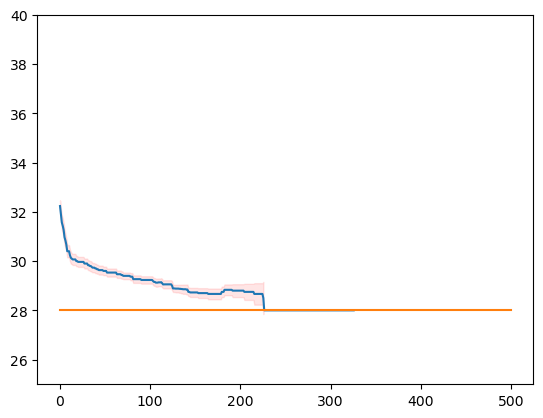

In [6]:
import scipy
from matplotlib import pyplot as plt
import numpy as np

# y = [np.mean([runs[j][i] for j in range(len(runs))]) for i in range(len(runs[0]))]
y = []
for i in range(500):
    m = []
    for j in range(len(runs)):
        if i < len(runs[j]):
            m.append(runs[j][i])
    y.append(np.mean(m))
x = np.linspace(0, len(y), len(y))
ci = []
for i in range(len(y)):
    m = []
    for j in range(len(runs)):
        if i < len(runs[j]):
            m.append(runs[j][i])
    ci.append(scipy.stats.t.interval(
        0.8,
        len(runs)-1,
        loc=np.mean(m),
        scale=scipy.stats.sem(m)
    ))
# print(ci)
optimal = schedule.makespan

fig, ax = plt.subplots()
ax.plot(x,y)
ym = [ci[i][0] for i in range(len(x))]
yp = [ci[i][1] for i in range(len(x))]
ax.fill_between(x, ym, yp, color='r', alpha=.1)
ax.plot([0, len(x)], [optimal, optimal])
ax.set(ylim = (25,40))